### Import necessary stuff

In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Load data

In [22]:
cats = [1220, 38, 60]
feature_dir = '../feature-extraction/data/final_table.csv'
df = pd.read_csv(feature_dir)
dfs = []
for cat in cats:
    df_cat = df[df['trends_query_with_cat_id'].str.endswith(str(cat))]
    dfs.append(df_cat)

X = []
y = []
for i in range(len(cats)):
    X.append(dfs[i].drop(['income', 'trends_query_with_cat_id'], axis=1).to_numpy())
    y.append(dfs[i]['income'].to_numpy())

(523, 263)


### Elastic Net Regression

In [45]:
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
kfold = 5

In [47]:
models = []
for i in range(len(cats)):
    model = ElasticNetCV(l1_ratio=l1_ratio, cv=kfold, max_iter=100000)
    model.fit(X[i], y[i])
    models.append(model)

In [48]:
y_pred = []
for i, model in enumerate(models):
    y_pred.append(model.predict(X[i]))

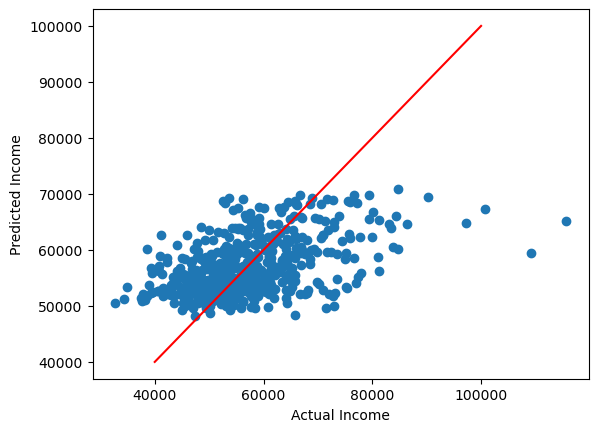

Expected Error: 8107.045144683016
L1 Error: 7096.333974611987


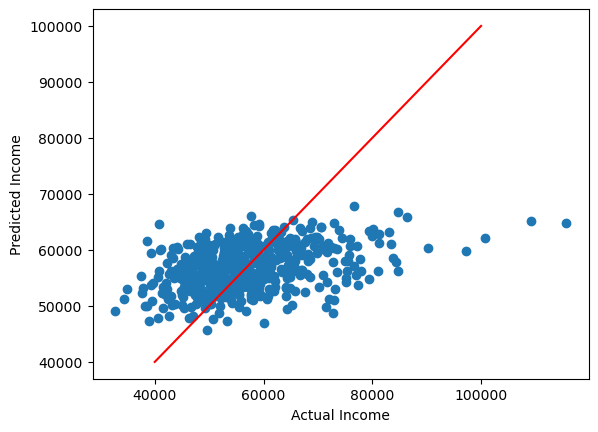

Expected Error: 8107.045144683016
L1 Error: 7475.089830947972


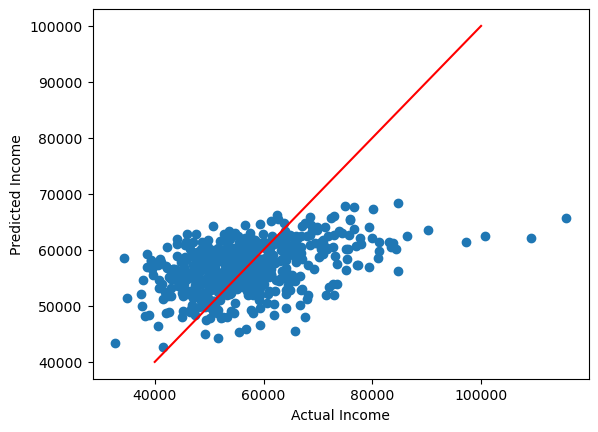

Expected Error: 8107.045144683016
L1 Error: 7327.71455550291


In [65]:
line_xy = np.linspace(40000, 100000, 100)
for i in range(len(cats)):
    plt.plot(line_xy, line_xy, '-r')
    plt.scatter(y[i], y_pred[i])
    plt.xlabel('Actual Income')
    plt.ylabel('Predicted Income')
    plt.show()
    print(f"Expected Error: {(np.abs(y[i].mean() - y[i])).mean()}")
    print(f"L1 Error: {(np.abs(y[i] - y_pred[i])).mean()}")

### PCA

In [83]:
num_dim = 8

In [87]:
models = []
pca_models = []
X_pca = []
for i in range(len(cats)):
    model = ElasticNetCV(l1_ratio=l1_ratio, cv=kfold, max_iter=100000)
    pca = PCA(num_dim)
    X_ = pca.fit_transform(X[i])
    X_pca.append(X_)
    model.fit(X_, y[i])
    models.append(model)
    pca_models.append(pca)

In [91]:
for pca_model in pca_models:
    print(pca_model.explained_variance_ratio_.sum())

0.9999825408801211
0.9999939013415093
0.9999938467403688


In [85]:
y_pred = []
for i, model in enumerate(models):
    y_pred.append(model.predict(X_pca[i]))

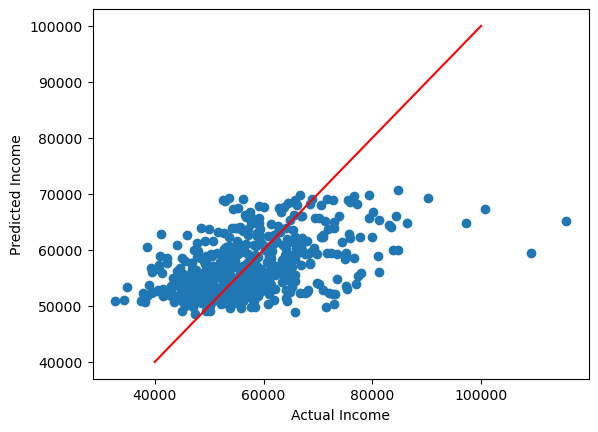

Expected Error: 8107.045144683016
L1 Error: 7098.280863774027


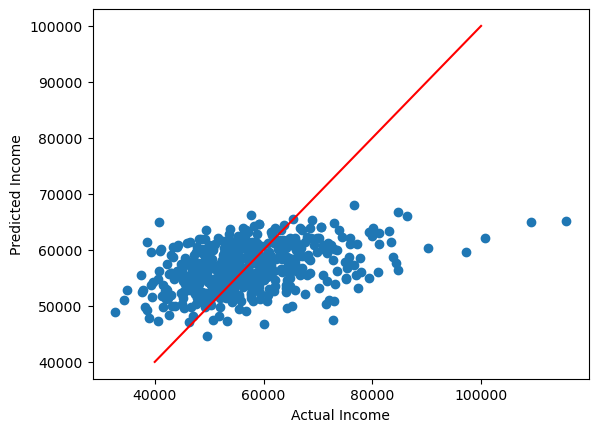

Expected Error: 8107.045144683016
L1 Error: 7459.700264798531


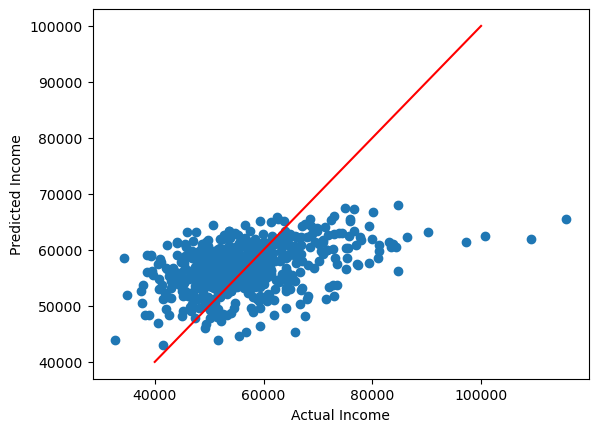

Expected Error: 8107.045144683016
L1 Error: 7322.779864745027


In [86]:
line_xy = np.linspace(40000, 100000, 100)
for i in range(len(cats)):
    plt.plot(line_xy, line_xy, '-r')
    plt.scatter(y[i], y_pred[i])
    plt.xlabel('Actual Income')
    plt.ylabel('Predicted Income')
    plt.show()
    print(f"Expected Error: {(np.abs(y[i].mean() - y[i])).mean()}")
    print(f"L1 Error: {(np.abs(y[i] - y_pred[i])).mean()}")